
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd
import warnings
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Date,Bel Air,Bd. Rép.
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58


In [4]:
df.tail()

,Date,Bel Air,Bd. Rép.
1456,12/27/2013,NaN,48.77
1457,12/28/2013,NaN,26.33
1458,12/29/2013,NaN,11.57
1459,12/30/2013,NaN,36.00
1460,12/31/2013,NaN,29.53


In [5]:
## Cleaning up the data
df.columns=["Month","Sales","rr"]
df.head()

,Month,Sales,rr
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58


In [6]:
## Drop last 2 rows
df.dropna()

,Month,Sales,rr
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58
...,...,...,...
1427,11/28/2013,19.05,11.96
1428,11/29/2013,22.64,10.40
1429,11/30/2013,21.74,19.09
1430,12/1/2013,22.87,20.58


In [7]:
df.tail()

,Month,Sales,rr
1456,12/27/2013,NaN,48.77
1457,12/28/2013,NaN,26.33
1458,12/29/2013,NaN,11.57
1459,12/30/2013,NaN,36.00
1460,12/31/2013,NaN,29.53


In [8]:
df.dropna()

,Month,Sales,rr
0,1/1/2010,39.45,51.21
1,1/2/2010,46.53,49.67
2,1/3/2010,37.03,44.08
3,1/4/2010,48.44,49.04
4,1/5/2010,39.79,40.58
...,...,...,...
1427,11/28/2013,19.05,11.96
1428,11/29/2013,22.64,10.40
1429,11/30/2013,21.74,19.09
1430,12/1/2013,22.87,20.58


In [9]:
df.tail()

,Month,Sales,rr
1456,12/27/2013,NaN,48.77
1457,12/28/2013,NaN,26.33
1458,12/29/2013,NaN,11.57
1459,12/30/2013,NaN,36.00
1460,12/31/2013,NaN,29.53


In [10]:
df=df.dropna()

In [11]:
df.tail()

,Month,Sales,rr
1427,11/28/2013,19.05,11.96
1428,11/29/2013,22.64,10.40
1429,11/30/2013,21.74,19.09
1430,12/1/2013,22.87,20.58
1431,12/2/2013,30.90,6.83


In [12]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.head()

,Month,Sales,rr
0,2010-01-01,39.45,51.21
1,2010-01-02,46.53,49.67
2,2010-01-03,37.03,44.08
3,2010-01-04,48.44,49.04
4,2010-01-05,39.79,40.58


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df.head()

,Sales,rr
Month,,
2010-01-01,39.45,51.21
2010-01-02,46.53,49.67
2010-01-03,37.03,44.08
2010-01-04,48.44,49.04
2010-01-05,39.79,40.58


In [16]:
df.describe()

,Sales,rr
count,1037.000000,1037.000000
mean,39.650203,36.977589
std,34.905175,33.215101
min,0.000000,0.640000
25%,21.560000,19.170000
50%,30.440000,28.080000
75%,45.240000,42.420000
max,489.380000,280.260000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

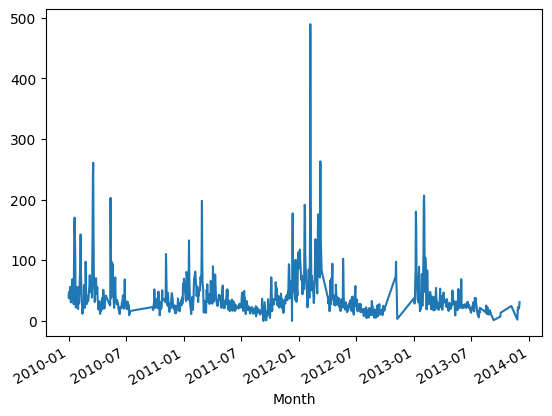

In [17]:
df['Sales'].plot()

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['Sales'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [21]:
adfuller_test(df['Sales'])

ADF Test Statistic : -3.8314619591129997
p-value : 0.0026013324436814584
#Lags Used : 16
Number of Observations Used : 1020
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [22]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [23]:
df['Sales'].shift(1)

Month
2010-01-01      NaN
2010-01-02    39.45
2010-01-03    46.53
2010-01-04    37.03
2010-01-05    48.44
              ...  
2013-11-28    22.46
2013-11-29    19.05
2013-11-30    22.64
2013-12-01    21.74
2013-12-02    22.87
Name: Sales, Length: 1037, dtype: float64

In [24]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [25]:
df.head(14)

,Sales,rr,Sales First Difference,Seasonal First Difference
Month,,,,
2010-01-01,39.45,51.21,NaN,NaN
2010-01-02,46.53,49.67,7.08,NaN
2010-01-03,37.03,44.08,-9.50,NaN
2010-01-04,48.44,49.04,11.41,NaN
2010-01-05,39.79,40.58,-8.65,NaN
2010-01-06,56.12,53.67,16.33,NaN
2010-01-07,43.35,42.29,-12.77,NaN
2010-01-08,30.44,30.29,-12.91,NaN
2010-01-11,47.44,52.64,17.00,NaN


In [26]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.638233343533386
p-value : 5.0074971575681685e-19
#Lags Used : 22
Number of Observations Used : 1002
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

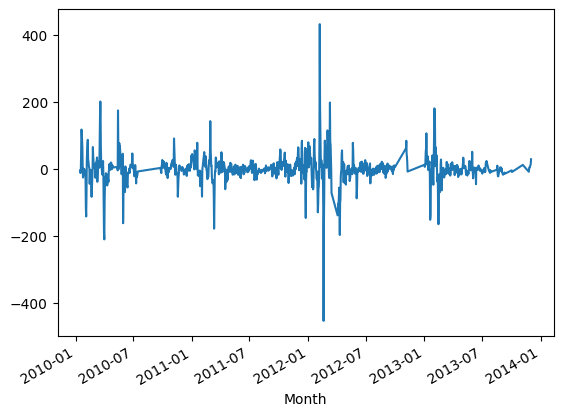

In [27]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
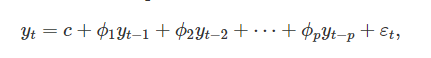

In [28]:
pip install pandas matplotlib

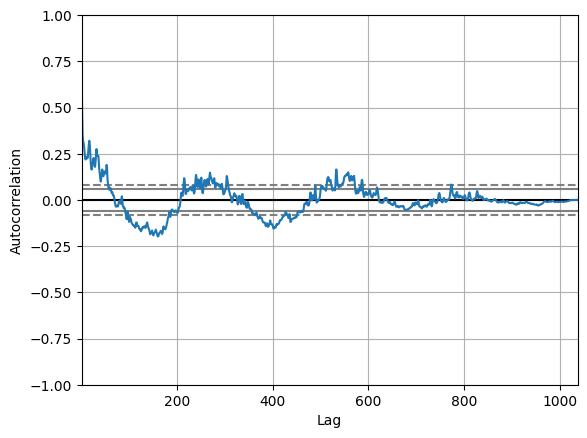

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Assuming df is your DataFrame containing the 'Sales' column
autocorrelation_plot(df['Sales'])
plt.show()

In [30]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm 

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df is your DataFrame containing the 'Sales' column

# Créez le modèle ARIMA
model = ARIMA(df['Sales'], order=(2, 1, 2))  # Vous pouvez ajuster le paramètre d'ordre selon vos besoins

# Adaptez le modèle
model_fit = model.fit()




In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
model = ARIMA(df['Sales'],order=(2,1,2))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=900,end=1030,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(2, 1, 2),seasonal_order=(1,1,1,12))
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=900,end=1030,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
future_df['forecast'] = results.predict(start = 1031, end = 1150, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 